# 1. Crear un entorno de anaconda con los paquetes que considere necesarios.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Cargar datos desde archivo .npy
data = np.load("proyecto_training_data.npy")

# 2. Definir nombres de columnas
column_names = ["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

# 3. Convertir a DataFrame
df = pd.DataFrame(data, columns=column_names)

print(df.head())
print(df.shape)

   SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0   208500.0          7.0     856.0           8.0     2003.0         65.0
1   181500.0          6.0    1262.0           6.0     1976.0         80.0
2   223500.0          7.0     920.0           6.0     2001.0         68.0
3   140000.0          7.0     961.0           7.0     1915.0         60.0
4   250000.0          8.0    1145.0           9.0     2000.0         84.0
(1460, 6)


# 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validaci´on y pruebas(20 %).

In [41]:
# Convertimos el DataFrame a array NumPy de nuevo (por requerimiento de usar slicing con NumPy)
data_array = df.values

# Calcular el índice del 80%
split_index = int(0.8 * len(data_array))

# Slicing: 80% para entrenamiento
train_data = data_array[:split_index]

# Slicing: 20% para validación/prueba
val_data = data_array[split_index:]

# Verificación de tamaños
print("Tamaño total:", data_array.shape)
print("Entrenamiento:", train_data.shape)
print("Validación/Prueba:", val_data.shape)

Tamaño total: (1460, 6)
Entrenamiento: (1168, 6)
Validación/Prueba: (292, 6)


# 3. An´alisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas):

In [42]:
# Convertimos el set de entrenamiento a DataFrame otra vez para facilitar análisis
df_train = pd.DataFrame(train_data, columns=column_names)

# Calculamos las estadísticas para cada columna
media = df_train.mean()
maximo = df_train.max()
minimo = df_train.min()
rango = df_train.max() - df_train.min()
desviacion_std = df_train.std()

# Mostramos los resultados
resumen = pd.DataFrame({
    "Media": media,
    "Máximo": maximo,
    "Mínimo": minimo,
    "Rango": rango,
    "Desviación estándar": desviacion_std
})

print(resumen)

                      Media    Máximo   Mínimo     Rango  Desviación estándar
SalePrice     180590.277397  755000.0  34900.0  720100.0         78815.697902
OverallQual        6.101027      10.0      1.0       9.0             1.378025
1stFlrSF        1156.323630    3228.0    334.0    2894.0           373.780374
TotRmsAbvGrd       6.485445      14.0      2.0      12.0             1.609141
YearBuilt       1971.451199    2010.0   1875.0     135.0            29.951707
LotFrontage       69.946985     313.0     21.0     292.0            23.478161


# 4. Para cada variable en el dataset usar seaborn(funci´on distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable.

C:\Users\lalvarez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


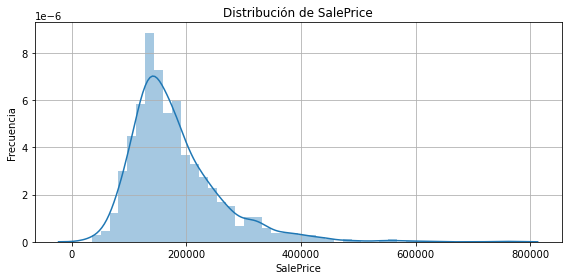

C:\Users\lalvarez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


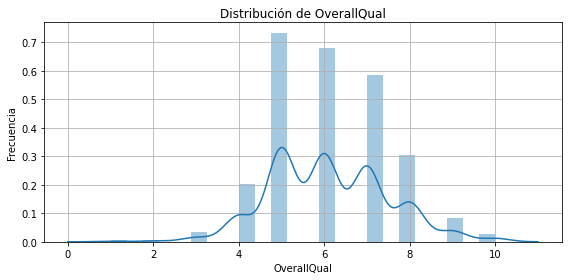

C:\Users\lalvarez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


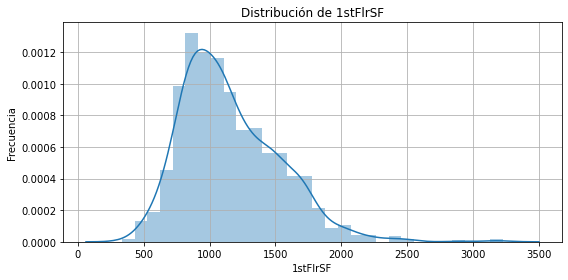

C:\Users\lalvarez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


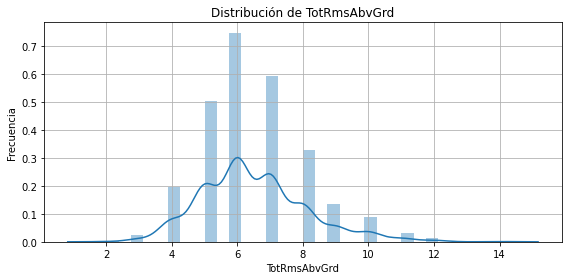

C:\Users\lalvarez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


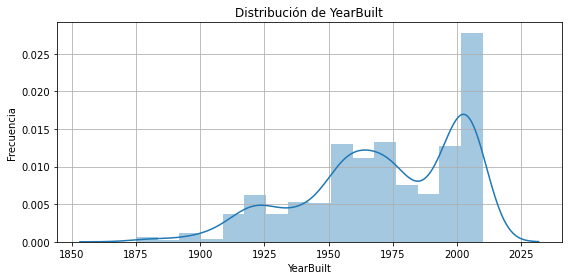

C:\Users\lalvarez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


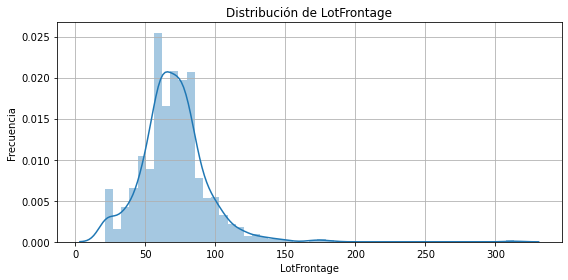

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarnos de que los datos estén en un DataFrame
df_train = pd.DataFrame(train_data, columns=column_names)

# Crear histogramas con distplot
for column in df_train.columns:
    plt.figure(figsize=(8, 4))
    sns.distplot(df_train[column], kde=True, hist=True)
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Variable dependiente y variables independientes

In [44]:
# variable dependiente
y_var = "SalePrice"

# variales independientes 
x_vars = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

y_var = "SalePrice"
x_vars = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

print("Variable dependiente (y):", y_var)
print("Variables independientes (x):", x_vars)

Variable dependiente (y): SalePrice
Variables independientes (x): ['OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']


# 5. Para cada variable independiente x :

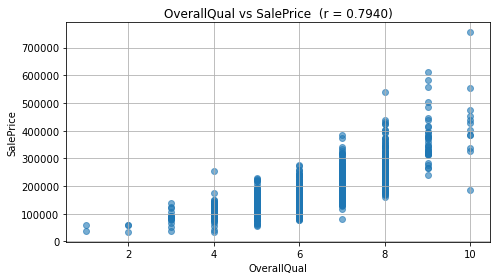

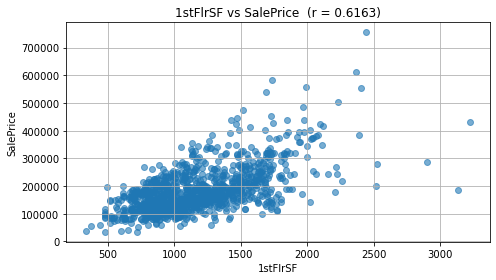

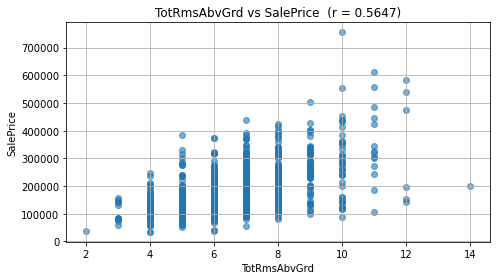

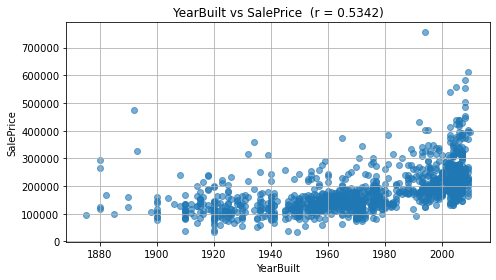

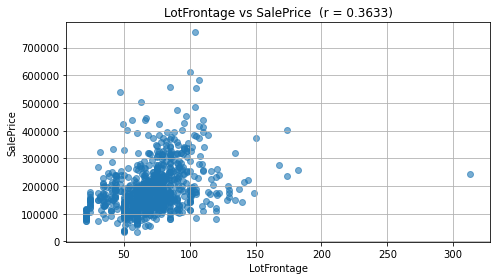


Top 2 variables con mayor correlación con SalePrice:
OverallQual: r = 0.7940
1stFlrSF: r = 0.6163


In [45]:
import matplotlib.pyplot as plt
import numpy as np


df_train = pd.DataFrame(train_data, columns=column_names)

y_var = "SalePrice"
x_vars = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

correlaciones = {}

for x in x_vars:
    # Calcular coeficiente de correlación de Pearson
    r = df_train[x].corr(df_train[y_var])
    correlaciones[x] = r

    # Graficar x vs y
    plt.figure(figsize=(7, 4))
    plt.scatter(df_train[x], df_train[y_var], alpha=0.6)
    plt.xlabel(x)
    plt.ylabel(y_var)
    plt.title(f"{x} vs {y_var}  (r = {r:.4f})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ordenar correlaciones de mayor a menor
sorted_corr = sorted(correlaciones.items(), key=lambda item: abs(item[1]), reverse=True)

# Mostrar las 2 variables con mayor correlación
print("\nTop 2 variables con mayor correlación con SalePrice:")
for var, r in sorted_corr[:2]:
    print(f"{var}: r = {r:.4f}")

# 6. Crear una funci´on para entrenar un modelo de regresi´on lineal de una variable y = β0 +β1 ∗x. La funci´on recibe como argumentos:

In [46]:
def entrenar_modelo_lineal(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)
    
    # Inicializar parámetros del modelo
    beta_0 = 0
    beta_1 = 0
    
    for epoch in range(1, epochs + 1):
        # Predicciones
        y_pred = beta_0 + beta_1 * x

        # Errores
        error = y_pred - y

        # Gradientes
        grad_b0 = np.mean(error)
        grad_b1 = np.mean(error * x)

        # Actualización de parámetros
        beta_0 -= alpha * grad_b0
        beta_1 -= alpha * grad_b1

        # Calcular error cuadrático medio (MSE)
        mse = np.mean(error ** 2)

        # Mostrar cada cierto número de iteraciones
        if epoch % imprimir_error_cada == 0:
            print(f"Iteración {epoch}: MSE = {mse:.4f}")
    
    # Devolver los coeficientes entrenados
    return beta_0, beta_1

In [47]:
# Tomamos una de las mejores variables independientes, por ejemplo: OverallQual
x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

# Entrenar el modelo
b0, b1 = entrenar_modelo_lineal(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)

print(f"\nModelo final: y = {b0:.2f} + {b1:.2f} * x")

Iteración 10: MSE = 2788908791.0477
Iteración 20: MSE = 2780695183.5100
Iteración 30: MSE = 2776105402.5689
Iteración 40: MSE = 2771559016.0494
Iteración 50: MSE = 2767055488.3134
Iteración 60: MSE = 2762594415.3268
Iteración 70: MSE = 2758175396.8685
Iteración 80: MSE = 2753798036.4908
Iteración 90: MSE = 2749461941.4828
Iteración 100: MSE = 2745166722.8361

Modelo final: y = -50.11 + 30356.46 * x


# 7. Para crear su funci´on debe considerar lo siguiente:

# a. Crear una matriz de 2 columnas, la primera columna corresponde al vector de datos x y la segunda columna de la matriz para todas las filas es igual a 1.

In [48]:
def entrenar_modelo_lineal(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)
    
    # Crear la matriz X: columna 1 = x, columna 2 = 1's
    X = np.column_stack((x, np.ones(n)))  # X.shape = (n, 2)

    # Inicializar parámetros (beta_1 y beta_0)
    beta = np.zeros(2)  # [beta_1, beta_0]

    for epoch in range(1, epochs + 1):
        # Predicciones
        y_pred = X @ beta  # producto punto matriz

        # Error
        error = y_pred - y

        # Gradiente (derivada del MSE)
        grad = (2 / n) * (X.T @ error)  # vector de tamaño (2,)

        # Actualizar parámetros
        beta -= alpha * grad

        # MSE
        mse = np.mean(error ** 2)

        # Imprimir error
        if epoch % imprimir_error_cada == 0:
            print(f"Iteración {epoch}: MSE = {mse:.4f}")
    
    # Retornar los coeficientes como beta_0 (intercepto) y beta_1 (pendiente)
    return beta[1], beta[0]  # ordenados como: (intercepto, pendiente)

x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

b0, b1 = entrenar_modelo_lineal(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)

print(f"\nModelo entrenado: y = {b0:.2f} + {b1:.2f} * x")

Iteración 10: MSE = 2781154448.2382
Iteración 20: MSE = 2772007642.0307
Iteración 30: MSE = 2763032517.1059
Iteración 40: MSE = 2754225851.0783
Iteración 50: MSE = 2745584482.0533
Iteración 60: MSE = 2737105307.4835
Iteración 70: MSE = 2728785283.0546
Iteración 80: MSE = 2720621421.5932
Iteración 90: MSE = 2712610791.9932
Iteración 100: MSE = 2704750518.1643

Modelo entrenado: y = -4512.02 + 31053.17 * x


# b. Inicializar los par´ametros del modelo en un vector β0 y β1, esto es equivalente a empezar el proceso con una recta inicial la cual en cada iteraci´on actualizaremos hasta encontrar una que aproxime de buena manera los datos x, y.

Iteración 20: MSE = 2772007642.0307
Iteración 40: MSE = 2754225851.0783
Iteración 60: MSE = 2737105307.4835
Iteración 80: MSE = 2720621421.5932
Iteración 100: MSE = 2704750518.1643


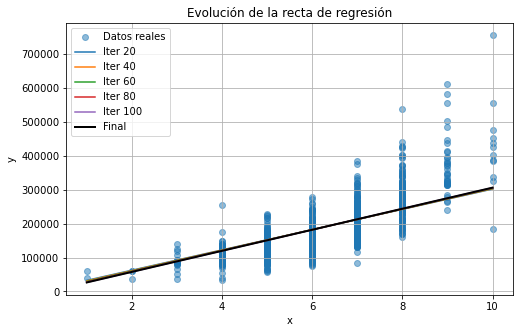


Modelo final: y = -4512.02 + 31053.17 * x


In [49]:
import matplotlib.pyplot as plt
import numpy as np

def entrenar_y_visualizar(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)
    X = np.column_stack((x, np.ones(n)))
    beta = np.array([0.0, 0.0])  # [beta_1, beta_0]

    historial = []  # Guardar los betas en momentos clave

    for epoch in range(1, epochs + 1):
        y_pred = X @ beta
        error = y_pred - y
        grad = (2 / n) * (X.T @ error)
        beta -= alpha * grad
        mse = np.mean(error ** 2)

        if epoch % imprimir_error_cada == 0:
            historial.append(beta.copy())
            print(f"Iteración {epoch}: MSE = {mse:.4f}")
    
    # Graficar evolución de las rectas
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, alpha=0.5, label='Datos reales')

    x_line = np.linspace(min(x), max(x), 100)

    for i, b in enumerate(historial):
        y_line = b[0] * x_line + b[1]
        plt.plot(x_line, y_line, label=f'Iter {imprimir_error_cada * (i + 1)}')

    # Última recta destacada
    final_line = beta[0] * x_line + beta[1]
    plt.plot(x_line, final_line, color='black', linewidth=2, label='Final')

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Evolución de la recta de regresión")
    plt.legend()
    plt.grid(True)
    plt.show()

    return beta[1], beta[0]  # (intercepto, pendiente)

x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

b0, b1 = entrenar_y_visualizar(x, y, epochs=100, imprimir_error_cada=20, alpha=0.01)

print(f"\nModelo final: y = {b0:.2f} + {b1:.2f} * x")

# c. por cada epoch(iteraci´on) debe:

# c.1. Calcular yˆ(predicci´on o estimaci´on)

In [50]:
def entrenar_modelo_lineal_vectorizado(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)

    # Crear matriz de diseño X: (n, 2)
    # Columna 1: x, Columna 2: 1s
    X = np.column_stack((x, np.ones(n)))

    # Inicializar parámetros: [beta_1, beta_0]
    beta = np.array([0.0, 0.0])

    for epoch in range(1, epochs + 1):
        # 🟢 1. Predicción vectorizada: y_hat = X @ beta
        y_hat = X @ beta  # Esto es equivalente a aplicar la fórmula: ŷ = β1 * x + β0 a todos

        # 🔴 2. Error: diferencia entre predicción y valor real
        error = y_hat - y

        # 🔵 3. Gradiente del error cuadrático medio
        grad = (2 / n) * (X.T @ error)

        # 🟠 4. Actualización de parámetros usando el gradiente
        beta -= alpha * grad

        # ⚪️ 5. Mostrar el error cada cierto número de iteraciones
        mse = np.mean(error ** 2)
        if epoch % imprimir_error_cada == 0:
            print(f"Iteración {epoch}: MSE = {mse:.4f}")

    return beta[1], beta[0]  # Devuelve como (intercepto, pendiente)

observacion = np.array([2, 1])         # [x, 1]
parametros = np.array([0.1, 0.2])      # [beta_1, beta_0]
y_hat = np.dot(observacion, parametros)
print("Predicción ejemplo: ŷ =", y_hat)  # Esperado: 0.1 * 2 + 0.2 = 0.4

Predicción ejemplo: ŷ = 0.4


# c.2. Calcular el error o costo usando: y ,y

In [51]:
def calcular_costo(y, y_hat):
    n = len(y)
    return (1 / (2 * n)) * np.sum((y - y_hat) ** 2)

def entrenar_modelo_lineal_vectorizado(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)

    # Crear matriz X con columna de x y columna de 1s
    X = np.column_stack((x, np.ones(n)))  # X.shape = (n, 2)

    # Inicializar parámetros beta = [beta_1, beta_0]
    beta = np.array([0.0, 0.0])

    for epoch in range(1, epochs + 1):
        # Predicción vectorizada
        y_hat = X @ beta

        # Cálculo de error (residuales)
        error = y_hat - y

        # Gradiente
        grad = (1 / n) * (X.T @ error)

        # Actualización de parámetros
        beta -= alpha * grad

        # Cálculo del costo
        costo = calcular_costo(y, y_hat)

        if epoch % imprimir_error_cada == 0:
            print(f"Iteración {epoch}: Costo J = {costo:.4f}")

    return beta[1], beta[0]  # (intercepto, pendiente)

In [52]:
x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

b0, b1 = entrenar_modelo_lineal_vectorizado(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)
print(f"\nModelo final: y = {b0:.2f} + {b1:.2f} * x")

Iteración 10: Costo J = 1394454395.5238
Iteración 20: Costo J = 1390347591.7550
Iteración 30: Costo J = 1388052701.2844
Iteración 40: Costo J = 1385779508.0247
Iteración 50: Costo J = 1383527744.1567
Iteración 60: Costo J = 1381297207.6634
Iteración 70: Costo J = 1379087698.4343
Iteración 80: Costo J = 1376899018.2454
Iteración 90: Costo J = 1374730970.7414
Iteración 100: Costo J = 1372583361.4181

Modelo final: y = -50.11 + 30356.46 * x


# c.3. Almacenar en un vector el error de cada iteración.

In [53]:
def calcular_costo(y, y_hat):
    n = len(y)
    return (1 / (2 * n)) * np.sum((y - y_hat) ** 2)

def entrenar_modelo_lineal_vectorizado(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)

    # Crear matriz X: columna x y columna de 1s
    X = np.column_stack((x, np.ones(n)))

    # Inicializar parámetros
    beta = np.array([0.0, 0.0])  # [beta_1, beta_0]

    # Inicializar lista para guardar el error en cada iteración
    historial_error = []

    for epoch in range(1, epochs + 1):
        # Predicción vectorizada
        y_hat = X @ beta

        # Error/residual
        error = y_hat - y

        # Gradiente del costo
        grad = (1 / n) * (X.T @ error)

        # Actualizar parámetros
        beta -= alpha * grad

        # Calcular y guardar el costo
        costo = calcular_costo(y, y_hat)
        historial_error.append(costo)

        # Imprimir si corresponde
        if epoch % imprimir_error_cada == 0:
            print(f"Iteración {epoch}: Costo J = {costo:.4f}")

    # Devuelve: intercepto, pendiente, historial de errores
    return beta[1], beta[0], historial_error

In [54]:
import pandas as pd

column_names = ["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

df_train = pd.DataFrame(train_data, columns=column_names)

x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

b0, b1, errores = entrenar_modelo_lineal_vectorizado(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)

print(f"\nModelo final: y = {b0:.2f} + {b1:.2f} * x")

Iteración 10: Costo J = 1394454395.5238
Iteración 20: Costo J = 1390347591.7550
Iteración 30: Costo J = 1388052701.2844
Iteración 40: Costo J = 1385779508.0247
Iteración 50: Costo J = 1383527744.1567
Iteración 60: Costo J = 1381297207.6634
Iteración 70: Costo J = 1379087698.4343
Iteración 80: Costo J = 1376899018.2454
Iteración 90: Costo J = 1374730970.7414
Iteración 100: Costo J = 1372583361.4181

Modelo final: y = -50.11 + 30356.46 * x


# c.4 Calcular el gradiente del error respecto de cada parámetro con las expresiones:

In [55]:
x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

X = np.column_stack((x, np.ones(len(x))))
beta = np.array([0.1, 0.2])  # valores iniciales
y_hat = X @ beta

grad = calcular_gradiente(X, y_hat, y)
print("Gradiente (β1, β0):", grad)

Gradiente (β1, β0): [-1187942.54160959  -180589.46729452]


# c.5 Actualizar los parámetros del modelo con la expresión

In [56]:
import numpy as np

# Supuestos: tienes x e y definidos
x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

# 1. Crear matriz X con columna de 1s
n = len(x)
X = np.column_stack((x, np.ones(n)))

# 2. Inicializar parámetros
beta = np.array([0.1, 0.2])  # [beta1, beta0]
alpha = 0.01

# 3. Predicción
y_hat = X @ beta

# 4. Calcular gradiente vectorizado
grad = (1 / n) * (X.T @ (y_hat - y))

# 5. Actualizar parámetros
beta = beta - alpha * grad

print("Nuevo beta:", beta)


Nuevo beta: [11879.5254161   1806.09467295]


# c.6 Almacenar en una estructura de datos el modelo resultante(a discreción del estudiante, por ejemplo un diccionario donde la llave es el námero de iteración y el valor es un vector con los parámetros).

In [57]:
def entrenar_modelo_con_historial(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)
    X = np.column_stack((x, np.ones(n)))
    beta = np.array([0.0, 0.0])  # [beta1, beta0]

    historial_errores = []
    historial_modelos = {}  # ✅ Diccionario para guardar parámetros por iteración

    for epoch in range(1, epochs + 1):
        y_hat = X @ beta
        error = y_hat - y

        grad = (1 / n) * (X.T @ error)
        beta -= alpha * grad

        costo = (1 / (2 * n)) * np.sum(error ** 2)
        historial_errores.append(costo)

        # ✅ Guardar copia de los parámetros en esta iteración
        historial_modelos[epoch] = beta.copy()

        if epoch % imprimir_error_cada == 0:
            print(f"Iteración {epoch}: Costo J = {costo:.4f}")

    return beta[1], beta[0], historial_errores, historial_modelos

In [58]:
x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

b0, b1, errores, modelos = entrenar_modelo_con_historial(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)

print(f"\nModelo final: y = {b0:.2f} + {b1:.2f} * x")

# Por ejemplo: parámetros en la iteración 50
print("\nParámetros en la iteración 50:", modelos[50])

Iteración 10: Costo J = 1394454395.5238
Iteración 20: Costo J = 1390347591.7550
Iteración 30: Costo J = 1388052701.2844
Iteración 40: Costo J = 1385779508.0247
Iteración 50: Costo J = 1383527744.1567
Iteración 60: Costo J = 1381297207.6634
Iteración 70: Costo J = 1379087698.4343
Iteración 80: Costo J = 1376899018.2454
Iteración 90: Costo J = 1374730970.7414
Iteración 100: Costo J = 1372583361.4181

Modelo final: y = -50.11 + 30356.46 * x

Parámetros en la iteración 50: [29995.70056152  2260.28420296]


# c.7 La función devuelve 2 resultados: La estructura de datos conteniendo el modelo de cada iteración y el error de cada iteración.

In [59]:
def entrenar_modelo_con_historial(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)
    X = np.column_stack((x, np.ones(n)))
    beta = np.array([0.0, 0.0])  # [beta1, beta0]

    historial_errores = []      # Para guardar el costo en cada iteración
    historial_modelos = {}      # Para guardar los parámetros en cada iteración

    for epoch in range(1, epochs + 1):
        y_hat = X @ beta
        error = y_hat - y

        grad = (1 / n) * (X.T @ error)
        beta -= alpha * grad

        # Calcular el costo (error cuadrático medio con 1/2n)
        costo = (1 / (2 * n)) * np.sum(error ** 2)

        # Guardar error y parámetros actuales
        historial_errores.append(costo)
        historial_modelos[epoch] = beta.copy()

        if epoch % imprimir_error_cada == 0:
            print(f"Iteración {epoch}: Costo J = {costo:.4f}")

    return historial_modelos, historial_errores

In [60]:
x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

modelos, errores = entrenar_modelo_con_historial(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)

# Ver modelo en iteración 1 y 100
print("Parámetros en iteración 1:", modelos[1])
print("Parámetros en iteración 100:", modelos[100])

# Ver errores al inicio y al final
print("Error en la primera iteración:", errores[0])
print("Error en la última iteración:", errores[-1])


Iteración 10: Costo J = 1394454395.5238
Iteración 20: Costo J = 1390347591.7550
Iteración 30: Costo J = 1388052701.2844
Iteración 40: Costo J = 1385779508.0247
Iteración 50: Costo J = 1383527744.1567
Iteración 60: Costo J = 1381297207.6634
Iteración 70: Costo J = 1379087698.4343
Iteración 80: Costo J = 1376899018.2454
Iteración 90: Costo J = 1374730970.7414
Iteración 100: Costo J = 1372583361.4181
Parámetros en iteración 1: [11879.47673801  1805.90277397]
Parámetros en iteración 100: [30356.4593658    -50.10601523]
Error en la primera iteración: 19409722053.221745
Error en la última iteración: 1372583361.4180565


# c. 8 Crear una funci´on que nos permita visualizar con matplotlib c´omo cambia el error en el tiempo: crear una funci´on que tome como par´ametro el vector de errores generados  por la funci´on de entrenamiento y grafique en el eje x el nu´mero de iteraci´on y en el eje y el error para esa iteraci´on.

In [61]:
import matplotlib.pyplot as plt

def graficar_error(errores):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(errores) + 1), errores, marker='o', linestyle='-')
    plt.xlabel("Iteración")
    plt.ylabel("Error (Costo J)")
    plt.title("Evolución del error durante el entrenamiento")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Iteración 10: Costo J = 1394454395.5238
Iteración 20: Costo J = 1390347591.7550
Iteración 30: Costo J = 1388052701.2844
Iteración 40: Costo J = 1385779508.0247
Iteración 50: Costo J = 1383527744.1567
Iteración 60: Costo J = 1381297207.6634
Iteración 70: Costo J = 1379087698.4343
Iteración 80: Costo J = 1376899018.2454
Iteración 90: Costo J = 1374730970.7414
Iteración 100: Costo J = 1372583361.4181


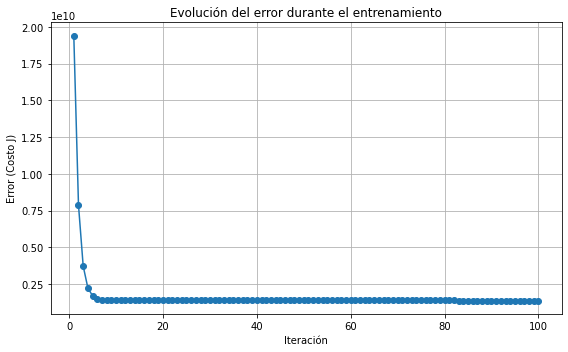

In [62]:
# Suponiendo que ya ejecutaste el entrenamiento:
modelos, errores = entrenar_modelo_con_historial(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)

# Llamas a la función de visualización
graficar_error(errores)

# c. 9 Crear una funci´on que nos permita visualizar con matplotlib c´omo evoluciona el modelo entrenado en el tiempo : Crear una funci´on que tome como par´ametro la estructura de datos conteniendo el historial de modelos ,y un valor ?n? que indica cada cuantas iteraciones graficar el modelo resultante, por ejemplo para n=3 la funci´on debe graficar la recta correspondiente al modelo junto a los datos cada 3 iteraciones, si se ejecutaron 15 iteraciones , para n = 3 se grafica el modelo de las iteraciones 3,6,9,12,15 junto con los datos de entrenamiento.

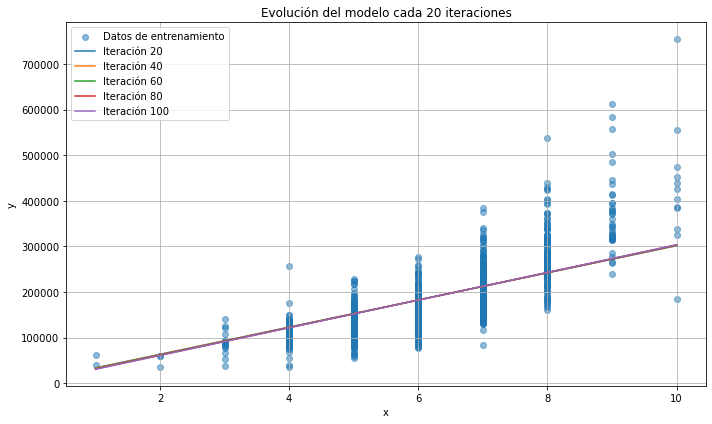

Iteración 10: Costo J = 1394454395.5238
Iteración 20: Costo J = 1390347591.7550
Iteración 30: Costo J = 1388052701.2844
Iteración 40: Costo J = 1385779508.0247
Iteración 50: Costo J = 1383527744.1567
Iteración 60: Costo J = 1381297207.6634
Iteración 70: Costo J = 1379087698.4343
Iteración 80: Costo J = 1376899018.2454
Iteración 90: Costo J = 1374730970.7414
Iteración 100: Costo J = 1372583361.4181


In [63]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_evolucion_modelo(modelos, x, y, n):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5, label='Datos de entrenamiento')

    # Crear rango de x para las rectas
    x_line = np.linspace(min(x), max(x), 100)

    for iteracion in sorted(modelos.keys()):
        if iteracion % n == 0:
            beta = modelos[iteracion]  # beta = [beta1, beta0]
            y_line = beta[0] * x_line + beta[1]
            plt.plot(x_line, y_line, label=f'Iteración {iteracion}')

    plt.title(f'Evolución del modelo cada {n} iteraciones')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    modelos, errores = entrenar_modelo_con_historial(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)

# Graficar cómo evoluciona la regresión cada 20 iteraciones
graficar_evolucion_modelo(modelos, x, y, n=20)

# c. 10 Utilizar las funciones del punto anterior para entrenar modelos de regresi´on lineal y = β0+β1 ∗x , para cada una de las variables x elegidas, bas´andose en las funciones para graficar las curvas de aprendizaje y comparaci´on del modelo vs los datos elegir el nu´mero de ?epochs? o iteraciones a entrenar el modelo(y experimentar con el α)



--- Entrenando modelo con: OverallQual ---
Iteración 10: Costo J = 0.4944
Iteración 20: Costo J = 0.4882
Iteración 30: Costo J = 0.4822
Iteración 40: Costo J = 0.4763
Iteración 50: Costo J = 0.4706
Iteración 60: Costo J = 0.4649
Iteración 70: Costo J = 0.4594
Iteración 80: Costo J = 0.4539
Iteración 90: Costo J = 0.4486
Iteración 100: Costo J = 0.4434


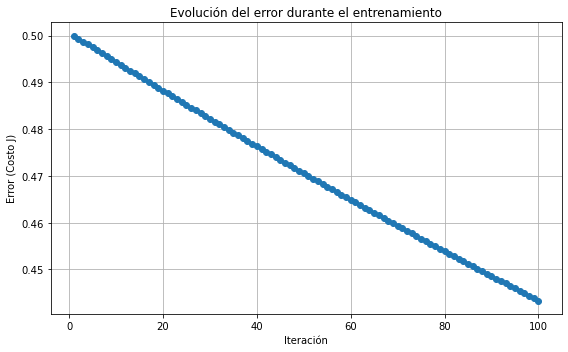

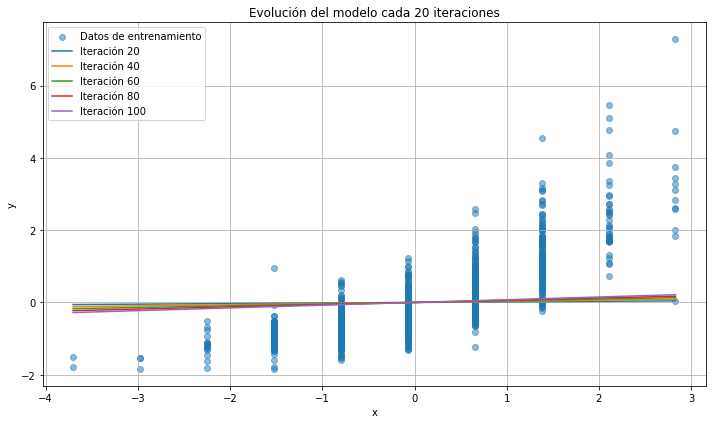

Iteración 10: Costo J = 0.4478
Iteración 20: Costo J = 0.3999
Iteración 30: Costo J = 0.3608
Iteración 40: Costo J = 0.3287
Iteración 50: Costo J = 0.3025
Iteración 60: Costo J = 0.2811
Iteración 70: Costo J = 0.2635
Iteración 80: Costo J = 0.2492
Iteración 90: Costo J = 0.2375
Iteración 100: Costo J = 0.2279

--- Entrenando modelo con: 1stFlrSF ---
Iteración 10: Costo J = 0.4966
Iteración 20: Costo J = 0.4929
Iteración 30: Costo J = 0.4893
Iteración 40: Costo J = 0.4857
Iteración 50: Costo J = 0.4823
Iteración 60: Costo J = 0.4789
Iteración 70: Costo J = 0.4755
Iteración 80: Costo J = 0.4722
Iteración 90: Costo J = 0.4690
Iteración 100: Costo J = 0.4659


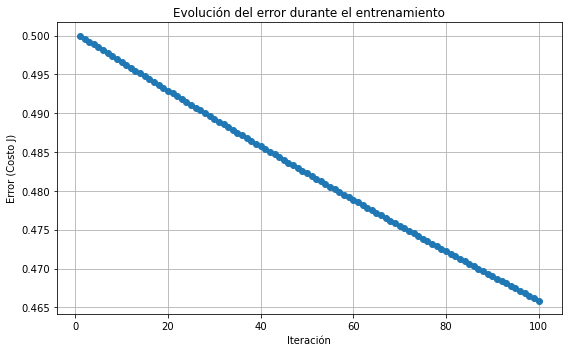

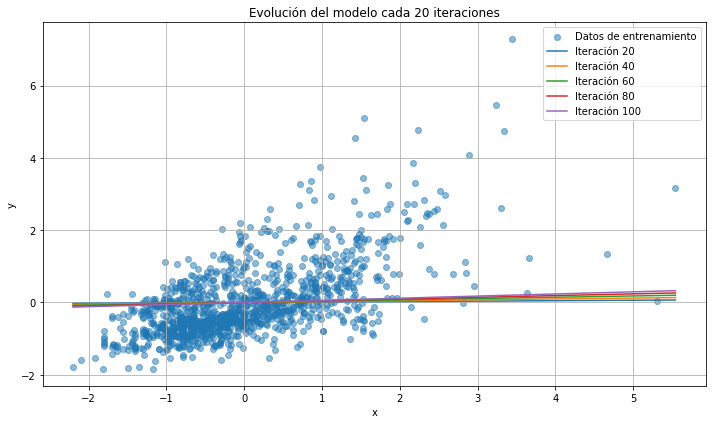

Iteración 10: Costo J = 0.4686
Iteración 20: Costo J = 0.4397
Iteración 30: Costo J = 0.4161
Iteración 40: Costo J = 0.3968
Iteración 50: Costo J = 0.3810
Iteración 60: Costo J = 0.3681
Iteración 70: Costo J = 0.3575
Iteración 80: Costo J = 0.3489
Iteración 90: Costo J = 0.3418
Iteración 100: Costo J = 0.3361

--- Entrenando modelo con: TotRmsAbvGrd ---
Iteración 10: Costo J = 0.4972
Iteración 20: Costo J = 0.4941
Iteración 30: Costo J = 0.4910
Iteración 40: Costo J = 0.4880
Iteración 50: Costo J = 0.4851
Iteración 60: Costo J = 0.4822
Iteración 70: Costo J = 0.4794
Iteración 80: Costo J = 0.4767
Iteración 90: Costo J = 0.4740
Iteración 100: Costo J = 0.4713


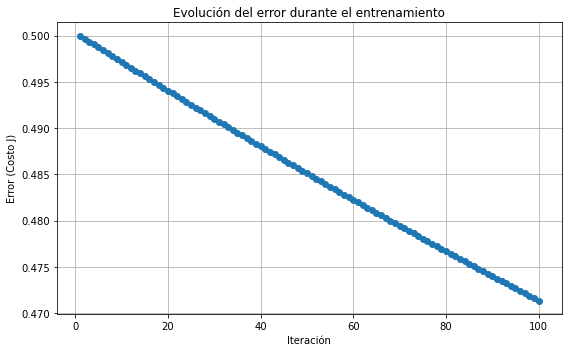

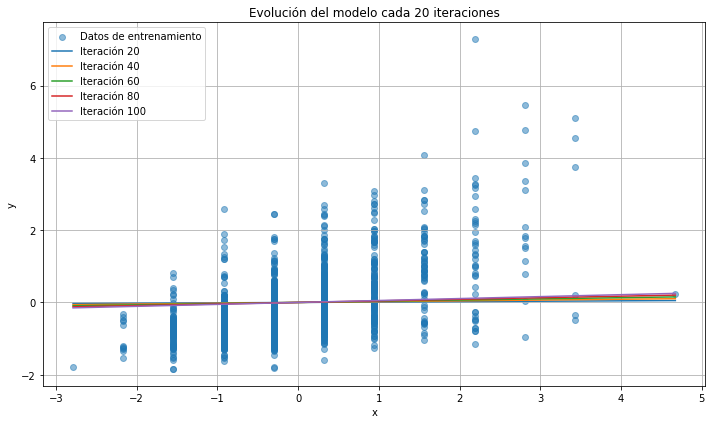

Iteración 10: Costo J = 0.4736
Iteración 20: Costo J = 0.4494
Iteración 30: Costo J = 0.4296
Iteración 40: Costo J = 0.4134
Iteración 50: Costo J = 0.4001
Iteración 60: Costo J = 0.3893
Iteración 70: Costo J = 0.3804
Iteración 80: Costo J = 0.3731
Iteración 90: Costo J = 0.3672
Iteración 100: Costo J = 0.3623

--- Entrenando modelo con: YearBuilt ---
Iteración 10: Costo J = 0.4975
Iteración 20: Costo J = 0.4947
Iteración 30: Costo J = 0.4920
Iteración 40: Costo J = 0.4893
Iteración 50: Costo J = 0.4867
Iteración 60: Costo J = 0.4841
Iteración 70: Costo J = 0.4816
Iteración 80: Costo J = 0.4791
Iteración 90: Costo J = 0.4767
Iteración 100: Costo J = 0.4744


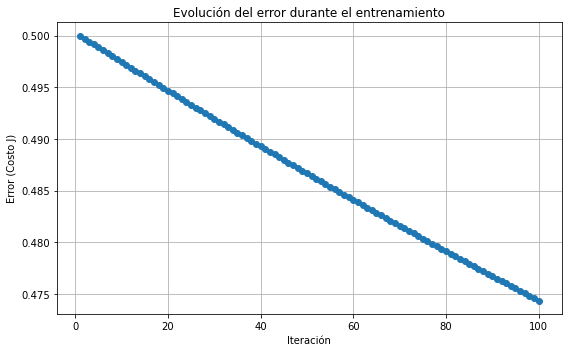

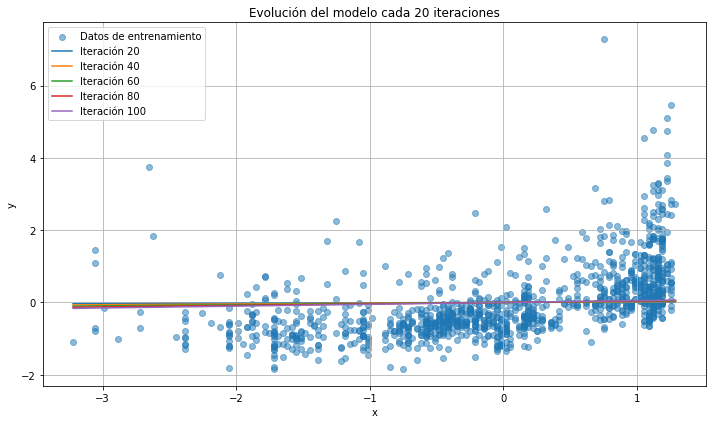

Iteración 10: Costo J = 0.4764
Iteración 20: Costo J = 0.4547
Iteración 30: Costo J = 0.4370
Iteración 40: Costo J = 0.4225
Iteración 50: Costo J = 0.4106
Iteración 60: Costo J = 0.4009
Iteración 70: Costo J = 0.3930
Iteración 80: Costo J = 0.3865
Iteración 90: Costo J = 0.3812
Iteración 100: Costo J = 0.3768

--- Entrenando modelo con: LotFrontage ---
Iteración 10: Costo J = 0.4988
Iteración 20: Costo J = 0.4975
Iteración 30: Costo J = 0.4963
Iteración 40: Costo J = 0.4950
Iteración 50: Costo J = 0.4938
Iteración 60: Costo J = 0.4927
Iteración 70: Costo J = 0.4915
Iteración 80: Costo J = 0.4904
Iteración 90: Costo J = 0.4892
Iteración 100: Costo J = 0.4881


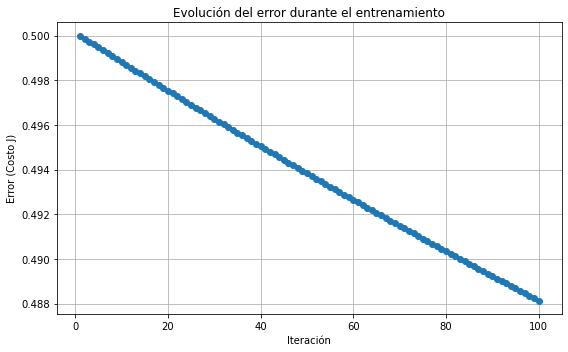

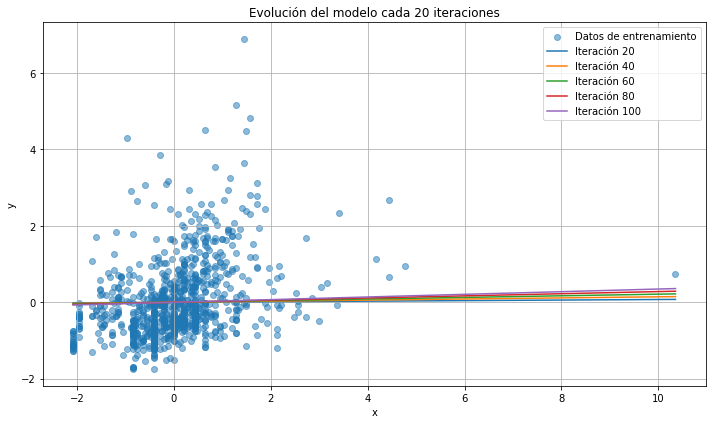

Iteración 10: Costo J = 0.4891
Iteración 20: Costo J = 0.4791
Iteración 30: Costo J = 0.4708
Iteración 40: Costo J = 0.4641
Iteración 50: Costo J = 0.4587
Iteración 60: Costo J = 0.4542
Iteración 70: Costo J = 0.4505
Iteración 80: Costo J = 0.4475
Iteración 90: Costo J = 0.4450
Iteración 100: Costo J = 0.4430


In [64]:
# Parámetros iniciales para experimentar
epochs = 100
alpha = 0.001
graficar_cada = 20  # cada cuántas iteraciones se quiere graficar la recta

for x_var in x_vars:
    print(f"\n--- Entrenando modelo con: {x_var} ---")

    # Obtener x e y crudos
    x_raw = df_train[x_var].values
    y_raw = df_train[y_var].values

    # ✅ Filtrar filas que NO tengan NaN en x ni en y
    valid_idx = ~np.isnan(x_raw) & ~np.isnan(y_raw)
    x_raw = x_raw[valid_idx]
    y_raw = y_raw[valid_idx]

    # ✅ Normalizar
    x = (x_raw - x_raw.mean()) / x_raw.std()
    y = (y_raw - y_raw.mean()) / y_raw.std()

    # Entrenar y obtener historial
    modelos, errores = entrenar_modelo_con_historial(x, y, epochs=epochs, imprimir_error_cada=10, alpha=alpha)

    # Graficar curva de error
    graficar_error(errores)

    # Graficar evolución del modelo
    graficar_evolucion_modelo(modelos, x, y, n=graficar_cada)

# c.11 Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresi´on lineal: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


--- Modelo con variable: OverallQual (scikit-learn) ---
Modelo: y = -96469.57 + 45412.00 * OverallQual
MSE: 2293832438.92
R²: 0.6304


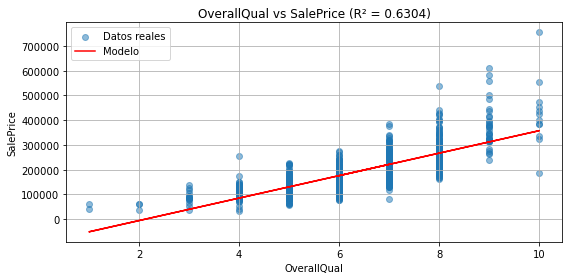


--- Modelo con variable: 1stFlrSF (scikit-learn) ---
Modelo: y = 30324.59 + 129.95 * 1stFlrSF
MSE: 3849257723.92
R²: 0.3798


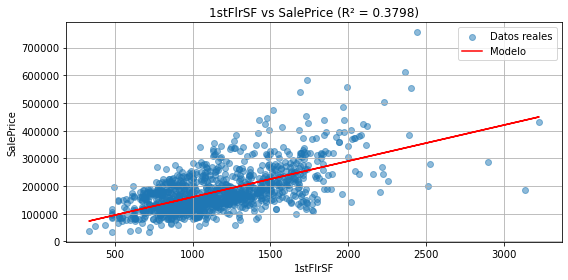

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Variables independientes seleccionadas (ajústalas si usaste otras)
x_vars = ["OverallQual", "1stFlrSF"]
y_var = "SalePrice"

for x_var in x_vars:
    print(f"\n--- Modelo con variable: {x_var} (scikit-learn) ---")

    # Obtener x e y crudos
    x_raw = df_train[x_var].values
    y_raw = df_train[y_var].values

    # ✅ Filtrar filas sin NaN
    valid_idx = ~np.isnan(x_raw) & ~np.isnan(y_raw)
    x = x_raw[valid_idx].reshape(-1, 1)  # scikit-learn necesita 2D
    y = y_raw[valid_idx]

    # Crear y entrenar modelo
    model = LinearRegression()
    model.fit(x, y)

    # Obtener coeficientes
    b0 = model.intercept_
    b1 = model.coef_[0]
    print(f"Modelo: y = {b0:.2f} + {b1:.2f} * {x_var}")

    # Predicción
    y_pred = model.predict(x)

    # Métricas
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.4f}")

    # Visualización
    plt.figure(figsize=(8, 4))
    plt.scatter(x, y, alpha=0.5, label="Datos reales")
    plt.plot(x, y_pred, color='red', label="Modelo")
    plt.title(f"{x_var} vs {y_var} (R² = {r2:.4f})")
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# c.12 Para cada variable independiente x elegida, crear una funci´on que usando el modelo entrenado manualmente y el modelo de scikit-learn(enviados como par´ametros a la funci´on) calcule la estimaci´on o predicci´on de cada uno de estos y devuelva como resultado una predicci´on estimada promediando las predicciones de los 2 modelos

In [66]:
import numpy as np

def predecir_combinado(x_input, beta_manual, modelo_sklearn):
    """
    x_input: vector 1D de valores de x (puede ser cualquier tamaño)
    beta_manual: tupla (b0, b1) del modelo manual
    modelo_sklearn: modelo entrenado de sklearn
    
    Devuelve: pred_manual, pred_sklearn, pred_promedio
    """
    # Asegurar que x_input es un array
    x_input = np.array(x_input)

    # 1. Predicción con el modelo manual: ŷ = β1 * x + β0
    b0, b1 = beta_manual
    pred_manual = b1 * x_input + b0

    # 2. Predicción con el modelo de scikit-learn
    x_input_reshaped = x_input.reshape(-1, 1)  # sklearn espera 2D
    pred_sklearn = modelo_sklearn.predict(x_input_reshaped)

    # 3. Promedio de ambas predicciones
    pred_promedio = (pred_manual + pred_sklearn) / 2

    return pred_manual, pred_sklearn, pred_promedio

x = df_train["OverallQual"].dropna().values
y = df_train["SalePrice"].dropna().values

# Paso 2: Normaliza si ya lo hiciste antes (opcional)
# x = (x - x.mean()) / x.std()
# y = (y - y.mean()) / y.std()

# Paso 3: Entrenar modelo manual
b0, b1, _ = entrenar_modelo_lineal_vectorizado(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)
beta_manual = (b0, b1)

# Paso 4: Entrenar modelo sklearn
from sklearn.linear_model import LinearRegression

X_reshape = x.reshape(-1, 1)
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_reshape, y)

# Paso 5: Hacer predicciones
x_test = np.array([4, 5, 6, 7, 8])  # valores de ejemplo

pred_manual, pred_sklearn, pred_combinado = predecir_combinado(x_test, beta_manual, modelo_sklearn)

# Paso 6: Mostrar resultados
print("Manual:", pred_manual)
print("Scikit-learn:", pred_sklearn)
print("Promedio:", pred_combinado)

Iteración 10: Costo J = 1394454395.5238
Iteración 20: Costo J = 1390347591.7550
Iteración 30: Costo J = 1388052701.2844
Iteración 40: Costo J = 1385779508.0247
Iteración 50: Costo J = 1383527744.1567
Iteración 60: Costo J = 1381297207.6634
Iteración 70: Costo J = 1379087698.4343
Iteración 80: Costo J = 1376899018.2454
Iteración 90: Costo J = 1374730970.7414
Iteración 100: Costo J = 1372583361.4181
Manual: [121375.73144797 151732.19081377 182088.65017957 212445.10954537
 242801.56891118]
Scikit-learn: [ 85178.4237979  130590.42257706 176002.42135622 221414.42013537
 266826.41891453]
Promedio: [103277.07762293 141161.30669541 179045.53576789 216929.76484037
 254813.99391285]


# c.13 Usando el 20 % de los datos de validación, aplicamos los modelos predictivos para estimar la variable dependiente y usando los valores reales de y calculamos el error de cada modelo. Para cada variable independiente x elegida: ◦ Graficar el error de cada modelo para esta variable ?x?. ◦ Concluir cuál modelo para la variable x es el mejor a ser usado (error mas bajo)


🔎 Validando modelos para variable: OverallQual
Iteración 10: Costo J = 0.4944
Iteración 20: Costo J = 0.4882
Iteración 30: Costo J = 0.4822
Iteración 40: Costo J = 0.4763
Iteración 50: Costo J = 0.4706
Iteración 60: Costo J = 0.4649
Iteración 70: Costo J = 0.4594
Iteración 80: Costo J = 0.4539
Iteración 90: Costo J = 0.4486
Iteración 100: Costo J = 0.4434


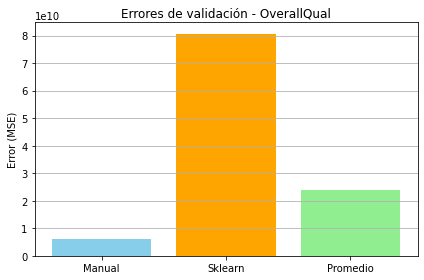

✅ Mejor modelo para OverallQual: Manual (MSE = 5970323274.86)

🔎 Validando modelos para variable: 1stFlrSF
Iteración 10: Costo J = 0.4966
Iteración 20: Costo J = 0.4929
Iteración 30: Costo J = 0.4893
Iteración 40: Costo J = 0.4857
Iteración 50: Costo J = 0.4823
Iteración 60: Costo J = 0.4789
Iteración 70: Costo J = 0.4755
Iteración 80: Costo J = 0.4722
Iteración 90: Costo J = 0.4690
Iteración 100: Costo J = 0.4659


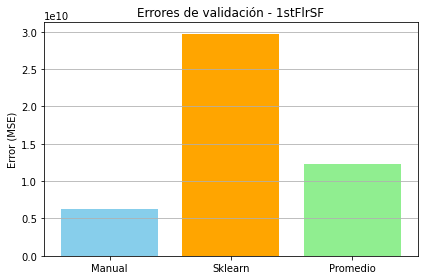

✅ Mejor modelo para 1stFlrSF: Manual (MSE = 6231705500.67)


In [67]:
for x_var in x_vars:
    print(f"\n🔎 Validando modelos para variable: {x_var}")

    # --- Entrenamiento ---
    x_train = df_train[x_var].values
    y_train = df_train[y_var].values

    # Quitar NaNs
    valid_idx = ~np.isnan(x_train) & ~np.isnan(y_train)
    x_train = x_train[valid_idx]
    y_train = y_train[valid_idx]

    # Normalización para entrenamiento manual
    x_mean, x_std = x_train.mean(), x_train.std()
    y_mean, y_std = y_train.mean(), y_train.std()
    x_train_norm = (x_train - x_mean) / x_std
    y_train_norm = (y_train - y_mean) / y_std

    # Entrenar modelo manual con normalizados
    b0, b1, _ = entrenar_modelo_lineal_vectorizado(x_train_norm, y_train_norm, epochs=100, alpha=0.001)
    beta_manual = (b0, b1)

    # Entrenar modelo sklearn con originales
    modelo_sklearn = LinearRegression()
    modelo_sklearn.fit(x_train.reshape(-1, 1), y_train)

    # --- Validación ---
    x_val = df_val[x_var].values
    y_val = df_val[y_var].values

    valid_idx = ~np.isnan(x_val) & ~np.isnan(y_val)
    x_val = x_val[valid_idx]
    y_val = y_val[valid_idx]

    # Normalizar x_val para usar modelo manual entrenado
    x_val_norm = (x_val - x_mean) / x_std

    # --- Predicciones ---
    pred_manual_norm, pred_sklearn, _ = predecir_combinado(x_val_norm, beta_manual, modelo_sklearn)

    # Desnormalizar la predicción manual
    pred_manual = pred_manual_norm * y_std + y_mean

    # Modelo combinado
    pred_combinado = (pred_manual + pred_sklearn) / 2

    # --- Validación segura ---
    if not np.all(np.isfinite(pred_manual)):
        print(f"⚠️ Modelo manual para {x_var} contiene valores no válidos.")
        continue

    # --- Cálculo de errores ---
    mse_manual = mean_squared_error(y_val, pred_manual)
    mse_sklearn = mean_squared_error(y_val, pred_sklearn)
    mse_comb = mean_squared_error(y_val, pred_combinado)

    # Gráfico de errores
    plt.figure(figsize=(6, 4))
    plt.bar(["Manual", "Sklearn", "Promedio"], [mse_manual, mse_sklearn, mse_comb],
            color=["skyblue", "orange", "lightgreen"])
    plt.ylabel("Error (MSE)")
    plt.title(f"Errores de validación - {x_var}")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

    # Mostrar conclusión
    mejores_modelos = {"Manual": mse_manual, "Sklearn": mse_sklearn, "Promedio": mse_comb}
    mejor = min(mejores_modelos, key=mejores_modelos.get)
    print(f"✅ Mejor modelo para {x_var}: {mejor} (MSE = {mejores_modelos[mejor]:.2f})")
